In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

2024-04-28 19:28:28.360128: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-28 19:28:28.423593: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-28 19:28:28.424396: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 19:28:29.209868: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
church_test = "/datalake/datasets/ML_Davis/image-matching-challenge-2024/test/church/images"
lizard_test = "/datalake/datasets/ML_Davis/image-matching-challenge-2024/test/lizard/images"
church_train = "/datalake/datasets/ML_Davis/image-matching-challenge-2024/train/church/images"
pond_train = "/datalake/datasets/ML_Davis/image-matching-challenge-2024/train/pond/images"
lizard_train = "/datalake/datasets/ML_Davis/image-matching-challenge-2024/train/lizard/images"
dioscuri_train = "/datalake/datasets/ML_Davis/image-matching-challenge-2024/train/dioscuri/images"
cup_train = "/datalake/datasets/ML_Davis/image-matching-challenge-2024/train/transp_obj_glass_cup/images"
cylinder_train = "/datalake/datasets/ML_Davis/image-matching-challenge-2024/train/transp_obj_glass_cylinder/images"
temple_train = "/datalake/datasets/ML_Davis/image-matching-challenge-2024/train/multi-temporal-temple-baalshamin/images"

In [3]:
case_test = "/home/klim/project/Test/CaseLibrary/"
ho_entrance_test = "/home/klim/project/Test/HoEntrance/"
ho_museum_test = "/home/klim/project/Test/HoMuseum/"
lab_test = "/home/klim/project/Test/Lab/"
mcgreg_test = "/home/klim/project/Test/McGregoryLounge/"
truck_test = "/home/klim/project/Test/Truck/"
case_train = "/home/klim/project/Train/CaseLibrary/"
ho_entrance_train = "/home/klim/project/Train/HoEntrance/"
ho_museum_train = "/home/klim/project/Train/HoMuseum/"
lab_train = "/home/klim/project/Train/Lab/"
mcgreg_train = "/home/klim/project/Train/McGregoryLounge/"
truck_train = "/home/klim/project/Train/Truck/"

In [4]:
def create_multiclass_classification_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [5]:
def load_images_and_labels(base_dirs, target_size=(128, 128)):
    images = []
    labels = []
    label_dict = {base_dir: idx for idx, base_dir in enumerate(base_dirs)}
    
    for base_dir in base_dirs:
        if os.path.isdir(base_dir):
            for file_name in sorted(os.listdir(base_dir)):
                file_path = os.path.join(base_dir, file_name)
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    #print(f"Attempting to load image: {file_path}")
                    try:
                        img = image.load_img(file_path, target_size=target_size)
                        img_array = image.img_to_array(img)
                        images.append(img_array)
                        labels.append(label_dict[base_dir])
                    except UnidentifiedImageError as e:
                        print(f"Error loading image: {file_path}")  
                        print(e)
        else:
            print(f"Not a directory: {base_dir}")
    if not images:
        print("No images found after processing.")
    else:
        print(f"Loaded {len(images)} images successfully.")
    
    return np.array(images), to_categorical(np.array(labels), num_classes=len(base_dirs))

In [6]:
train_dirs = [
    case_train,
    ho_entrance_train,
    ho_museum_train,
    lab_train,
    mcgreg_train,
    truck_train
]

test_dirs = [
    case_test,
    ho_entrance_test,
    ho_museum_test,
    lab_test,
    mcgreg_test,
    truck_test
]

# Load training and testing data
train_images, train_labels = load_images_and_labels(train_dirs)
test_images, test_labels = load_images_and_labels(test_dirs)
print("Training dataset size:")
print("Images:", train_images.shape) 
print("Labels:", train_labels.shape)  
print("Test dataset size:")
print("Images:", test_images.shape)  
print("Labels:", test_labels.shape)  
# Model setup
input_shape = (128, 128, 3)
num_classes = 6  
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_images, train_labels, batch_size=3)
test_generator = test_datagen.flow(test_images, test_labels, batch_size=3)
# Model setup and training
model = create_multiclass_classification_cnn(input_shape=(128, 128, 3), num_classes=6)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Loaded 115 images successfully.
Loaded 59 images successfully.
Training dataset size:
Images: (115, 128, 128, 3)
Labels: (115, 6)
Test dataset size:
Images: (59, 128, 128, 3)
Labels: (59, 6)
Epoch 1/10


2024-04-28 19:28:40.584584: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


39/39 [==============================] - ETA: 0s - loss: 2.0503 - accuracy: 0.1826

2024-04-28 19:28:46.984239: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


39/39 [==============================] - 7s 150ms/step - loss: 2.0503 - accuracy: 0.1826 - val_loss: 1.5935 - val_accuracy: 0.2542
Epoch 2/10
39/39 [==============================] - 6s 147ms/step - loss: 1.5383 - accuracy: 0.3304 - val_loss: 1.6250 - val_accuracy: 0.3559
Epoch 3/10
39/39 [==============================] - 6s 143ms/step - loss: 1.2263 - accuracy: 0.5043 - val_loss: 1.3418 - val_accuracy: 0.4407
Epoch 4/10
39/39 [==============================] - 6s 145ms/step - loss: 1.4294 - accuracy: 0.5043 - val_loss: 1.0441 - val_accuracy: 0.5593
Epoch 5/10
39/39 [==============================] - 5s 142ms/step - loss: 0.8265 - accuracy: 0.6609 - val_loss: 0.9053 - val_accuracy: 0.5254
Epoch 6/10
39/39 [==============================] - 6s 143ms/step - loss: 0.6661 - accuracy: 0.7304 - val_loss: 0.7302 - val_accuracy: 0.6610
Epoch 7/10
39/39 [==============================] - 6s 143ms/step - loss: 0.3556 - accuracy: 0.8609 - val_loss: 0.6863 - val_accuracy: 0.7119
Epoch 8/10
39/39 

In [9]:
def predict_folders(image_paths, model, target_size=(128, 128)):
    images = [image.load_img(path, target_size=target_size) for path in image_paths]
    images = np.array([image.img_to_array(img) for img in images])
    images = images / 255.0  # Rescale as done with training data
    predictions = model.predict(images)
    return np.argmax(predictions, axis=1)
    
def pick_two_random_images(folder):
    # Get a list of all image files in the folder
    files = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if len(files) < 2:
        raise ValueError("The folder must contain at least two image files.")
    
    # Randomly choose two unique images
    random_filenames = random.sample(files, 2)
    image_paths = [os.path.join(folder, filename) for filename in random_filenames]
    
    return image_paths, random_filenames
def are_images_from_same_folder(image_path1, image_path2, model):
    # Load and preprocess the images
    img1 = image.load_img(image_path1, target_size=(128, 128))
    img1_array = image.img_to_array(img1)
    img1_processed = np.expand_dims(img1_array, axis=0) / 255.0  # Normalize

    img2 = image.load_img(image_path2, target_size=(128, 128))
    img2_array = image.img_to_array(img2)
    img2_processed = np.expand_dims(img2_array, axis=0) / 255.0  # Normalize

    # Combine the images into one batch
    batch = np.vstack([img1_processed, img2_processed])

    # Use the model to predict the class of each image in the batch
    predictions = model.predict(batch)
    classes = np.argmax(predictions, axis=1)
    
    # Check if predicted classes of both images are the same
    return classes[0] == classes[1], img1, img2



1/1 [==============================] - 0s 29ms/step
Selected image 1: Copy of IMG20240425101055.jpg
Selected image 2: IMG_9765.JPG
Images are from the same folder: False


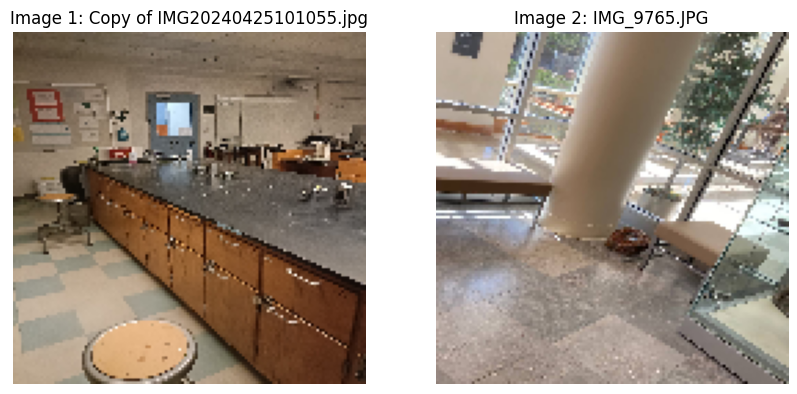

In [10]:
random_image_folder = '/home/klim/project/Final/'

image_paths, image_names = pick_two_random_images(random_image_folder)

# Assign the paths to testimage1 and testimage2
testimage1, testimage2 = image_paths

# Use the model to predict if they are from the same folder
result, img1, img2 = are_images_from_same_folder(testimage1, testimage2, model)

# Print the filenames and the result
print("Selected image 1:", image_names[0])
print("Selected image 2:", image_names[1])
print("Images are from the same folder:", result)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Image 1: ' + image_names[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Image 2: ' + image_names[1])
plt.axis('off')

plt.show()